# **Nubes de palabras**

Trabajaremos con el dataset [Wine Reviews](https://www.kaggle.com/zynicide/wine-reviews)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Librerías a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from PIL import Image #Para manejo de imágenes
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
#Ponerlo en un data frame
path = "/content/drive/MyDrive/CursoPythonAvanzado/BreveRepasoDePython/Datasets/winemag.csv"
df = pd.read_csv(path, encoding = "ISO-8859-1", index_col=0)
df.head ()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",VulkÃ Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin OâKeefe,@kerinokeefe,Nicosia 2013 VulkÃ Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwineÂ,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


**Alguna información básica**

In [4]:
print ("Hay {} ejemplos y {} características en el dataset.\n". format(df.shape[0], df.shape[1]))
print ("Hay {} tipos de vino en el dataset, como {} entre otros.\n". format (len(df.variety.unique()),", ".join(df.variety.unique()[0:5])))
print ("Hay {} países productores de vino en el dataset, como {} entre otros.\n". format (len(df.country.unique()),", ".join(df.country.unique()[0:5])))

Hay 129971 ejemplos y 13 características en el dataset.

Hay 708 tipos de vino en el dataset, como White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir entre otros.

Hay 44 países productores de vino en el dataset, como Italy, Portugal, US, Spain, France entre otros.



Como el conjunto es grande se pueden agrupar, por ejemplo por país y dar estadísticas

In [5]:
 #Agrupación por país
 país = df.groupby ("country")
 #resuman estadístico
 país.describe().head ()

points                       ... price               
                         count       mean       std  ...   50%    75%     max
country                                              ...                     
Argentina               3800.0  86.710263  3.179627  ...  17.0  25.00   230.0
Armenia                    2.0  87.500000  0.707107  ...  14.5  14.75    15.0
Australia               2329.0  88.580507  2.989900  ...  21.0  38.00   850.0
Austria                 3345.0  90.101345  2.499799  ...  25.0  36.50  1100.0
Bosnia and Herzegovina     2.0  86.500000  2.121320  ...  12.5  12.75    13.0

[5 rows x 16 columns]

In [44]:
#Los 5 países con mayor puntaje de los 44
país.mean().sort_values(by="points",ascending = False).head (20)

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598
Hungary,89.191781,40.648276
China,89.000000,18.000000
France,88.845109,41.139120
Luxembourg,88.666667,23.333333


##**Ejercicio 1:**
Obtener los 5 países con menor puntaje

In [7]:
país.mean().sort_values(by="points",ascending = True).head ()

,points,price
country,,
Peru,83.562500,18.062500
Egypt,84.000000,NaN
Ukraine,84.071429,9.214286
Brazil,84.673077,23.765957
Mexico,85.257143,26.785714


Gráfica del número de vinos por país

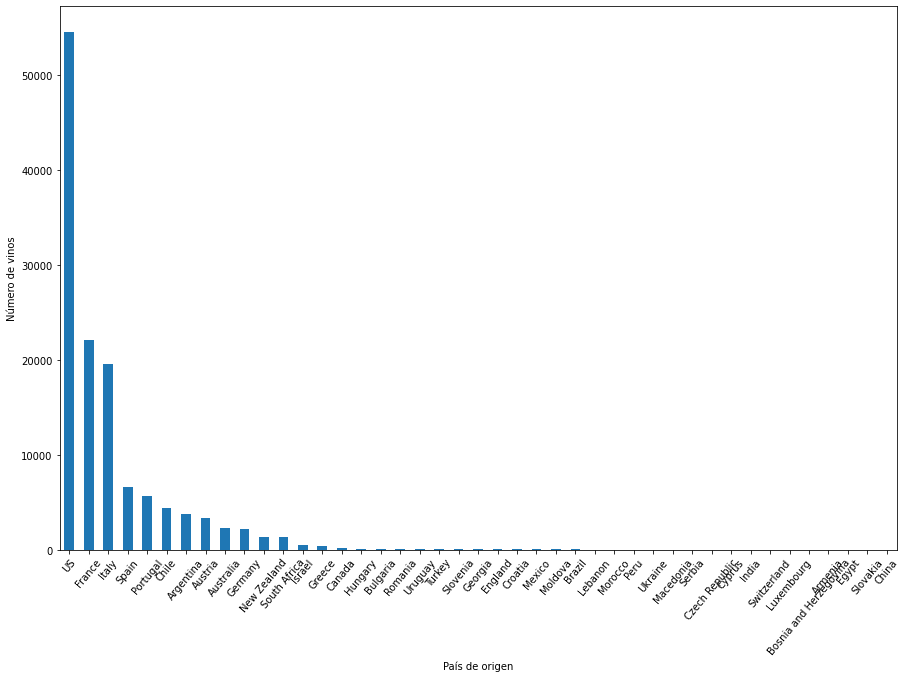

In [8]:
plt.figure(figsize=(15,10))
país.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("País de origen")
plt.ylabel("Número de vinos")
plt.show ()

##**Ejercicio 2:**

Graficar los 20 países con evaluaciones más altas

Text(0, 0.5, 'Puntaje de vinos')

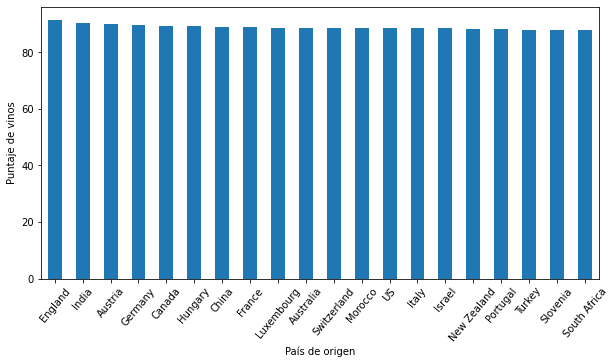

In [43]:
#Gráfica de los 20 países con evaluaciones más altas

plt.figure(figsize=(10,5))
país.mean().sort_values(by="points",ascending = False).head (20).points.plot.bar()
plt.xticks(rotation=50)

plt.xlabel("País de origen")
plt.ylabel("Puntaje de vinos")


# **Word Cloud**

Word Cloud es una técnica para mostrar las frecuencias más altas de las palabras en un dataset dado un texto.
Los pasos para generar una word cloud son:

1.   Extraer el texto
2.   Crear y generar la imagen
3.   Desplegar la imagen usando matplotlb

In [10]:
#Desplegar ayuda
?WordCloud

Vamos a usar la primera descripción
para consultar las interpolaciones para imshow: https://matplotlib.org/stable/gallery/images_contours_and_fields/interpolation_methods.html

Quinta dos Avidagos 2011 Avidagos Red (Douro) 



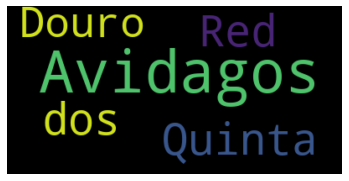

In [11]:
texto = df.title[1]
texto2 = df.region_1[1]
print (texto,"\n")
#creación y generación de la imagen del word cloud
nube = WordCloud().generate(texto)
#Desplegar la imagen
plt.figure ()
plt.imshow(nube, interpolation = 'bilinear')
plt.axis("off")
plt.show()

Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity. 



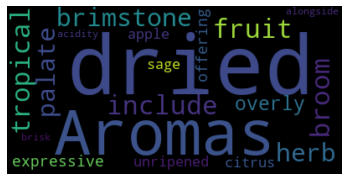

In [12]:
texto = df.description[0]
print (texto,"\n")
#creación y generación de la imagen del word cloud
nube = WordCloud().generate(texto)
#Desplegar la imagen
plt.figure ()
plt.imshow(nube, interpolation = 'bilinear')
plt.axis("off")
plt.show()

Cambiando algunos parámetros: max_font_size, max_word, background_color

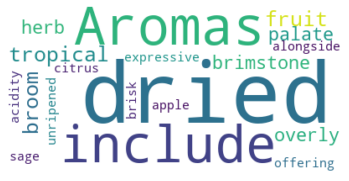

In [13]:
nube1 = WordCloud(max_font_size=100, max_words=20, background_color="white").generate(texto)
#Desplegar la imagen
plt.figure()
plt.imshow(nube1, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [14]:
#Guardarlo en un archivo
nube1.to_file ("nube1.png")
!ls -a

.  ..  .config	drive  nube1.png  sample_data


# **Análisis de todas las descripciones de los vinos**

In [15]:
#Juntar todas las descripciones
texto = " ".join(rev for rev in df.description)
print ("Hay {} palabras en todas las descripciones. " .format(len(texto)))

Hay 31698868 palabras en todas las descripciones. 


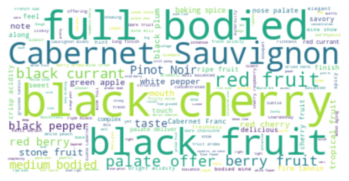

In [32]:
#Crear una lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["drink", "now", "flavor", "flavors"])

#Generación del wordcloude
nube2 = WordCloud (stopwords=stopwords, background_color="white").generate(texto)
#Desplegar la imagen
plt.figure()
plt.imshow(nube2, interpolation = 'bicubic')
plt.axis("off")
plt.show()

##**Ejercicio 3:**
Determinar cuántas palabras hay después de quitar las stopwords

In [31]:
len(stopwords)

195

#Uso de máscaras

In [18]:
path = "/content/drive/MyDrive/CursoPythonAvanzado/BreveRepasoDePython/Datasets/wine_mask.png"
botellaMask = np.array(Image.open (path))
botellaMask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [19]:
#Para que funcione la máscara se requiere cambiar de 0 a 255

def transforma(val):
  if val == 0:
    return 255
  else:
    return val

In [20]:
#Aplicar la transformación a la imagen
transMascara = np.ndarray ((botellaMask.shape[0], botellaMask.shape[1]), np.int32)
for i in range (len(botellaMask)):
  transMascara [i] = list (map(transforma, botellaMask[i]))
transMascara

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

Utilizar el argurmento mask de WordCloud

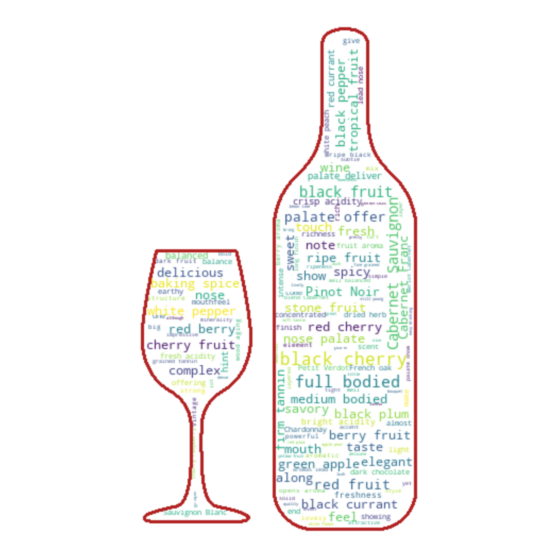

In [21]:
nubeB = WordCloud(background_color="white", max_words=750, mask=transMascara,
                  stopwords=stopwords, contour_width=3, contour_color='firebrick')
nubeB.generate (texto)
plt.figure (figsize=[20,10])
plt.imshow(nubeB, interpolation = 'bicubic')
plt.axis("off")
plt.show()

# **Revisiones por país usando su bandera**,
Creación de un wordcloud siguiendo el patrón por color

Combinar las revisiones de los 5 países con más vino

In [22]:
pA = país.size().sort_values(ascending=False)
pA.head ()

country
US          54504
France      22093
Italy       19540
Spain        6645
Portugal     5691
dtype: int64

Juntar las descripciones de cada país, usando join(list)

In [23]:
usa = " ".join(review for review in df[df["country"]=="US"].description)
fra = " ".join(review for review in df[df["country"]=="France"].description)
ita = " ".join(review for review in df[df["country"]=="Italy"].description)
spa = " ".join(review for review in df[df["country"]=="Spain"].description)
por = " ".join(review for review in df[df["country"]=="Portugal"].description)

Creación del wordcloud con mascara de colores

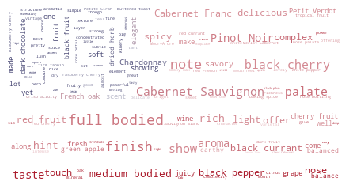

In [24]:
# Generación de la imagen
masc= np.array(Image.open("/content/drive/MyDrive/CursoPythonAvanzado/BreveRepasoDePython/Datasets/us.png"))
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=150, mask=masc).generate(usa)

# se toman los colores de la imagen
imagenColores = ImageColorGenerator(masc)
plt.figure()
plt.imshow(wordcloud_usa.recolor(color_func=imagenColores), interpolation="nearest")
plt.axis("off")

# almacenamiento de la imagen
plt.savefig("us_wine.png", format="png")

plt.show()

##**Ejercicio 4:**
Hacer una función para hacer el wordcloud de sus vinos favoritos usando sus banderas.

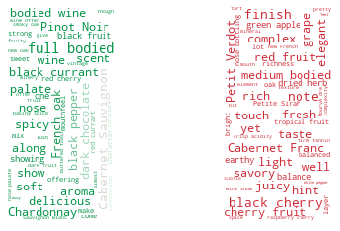

In [33]:
# Generación de la imagen
path = "/content/drive/MyDrive/CursoPythonAvanzado/BreveRepasoDePython/Datasets/ItalyFlag.png"
masc= np.array(Image.open(path))
stopwords.update(["drink", "now", "flavor", "flavors"])
wordcloud_usa = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=150, mask=masc).generate(usa)

# se toman los colores de la imagen
imagenColores = ImageColorGenerator(masc)
plt.figure()
plt.imshow(wordcloud_usa.recolor(color_func=imagenColores), interpolation="nearest")
plt.axis("off")

# almacenamiento de la imagen
plt.savefig("us_wine.png", format="png")

plt.show()